In [ ]:
# Name:Mohit Kumar Rao
# AIML


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the train-data CSV file
train_data = pd.read_csv('train-data.csv')

# Load the test-data CSV file
test_data = pd.read_csv('test-data.csv')

In [4]:
# Remove unnecessary columns (such as 'Unnamed: 0' and 'New_Price')
train_data = train_data.drop(['Unnamed: 0', 'New_Price'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'New_Price'], axis=1)

In [5]:
# Add a flag column to differentiate train and test datasets
train_data['Flag'] = 1
test_data['Flag'] = 0

In [6]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data, test_data])


In [7]:
# Preprocess the data
combined_data['Mileage'] = combined_data['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
combined_data['Engine'] = combined_data['Engine'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
combined_data['Power'] = combined_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [8]:
# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

In [9]:
# Perform one-hot encoding on the combined dataset
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(combined_data)

C:\Users\mohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Split the combined data back into train and test datasets
X_train = encoded_data[combined_data['Flag'] == 1, :-1]
y_train = encoded_data[combined_data['Flag'] == 1, -1]
X_test = encoded_data[combined_data['Flag'] == 0, :-1]


In [11]:
# Fill missing values with 0
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Build the ANN model with ReLU activation
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
189/189 [==============================] - 2s 10ms/step - loss: 0.2768
Epoch 2/10
189/189 [==============================] - 2s 10ms/step - loss: 0.3092
Epoch 3/10
189/189 [==============================] - 2s 11ms/step - loss: 0.1769
Epoch 4/10
189/189 [==============================] - 2s 10ms/step - loss: 0.0663
Epoch 5/10
189/189 [==============================] - 2s 10ms/step - loss: 0.0320
Epoch 6/10
189/189 [==============================] - 2s 11ms/step - loss: 0.0122
Epoch 7/10
189/189 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 8/10
189/189 [==============================] - 2s 11ms/step - loss: 0.0034
Epoch 9/10
189/189 [==============================] - 2s 10ms/step - loss: 0.0026
Epoch 10/10
189/189 [==============================] - 2s 10ms/step - loss: 0.0024


In [16]:
# Predict on the test data
predictions = model.predict(X_test_scaled)

39/39 [==============================] - 0s 2ms/step


In [17]:
# Print the predicted prices
print(predictions)

[[0.6229848 ]
 [1.0078396 ]
 [1.0554951 ]
 ...
 [0.98170406]
 [1.0575209 ]
 [0.9957693 ]]


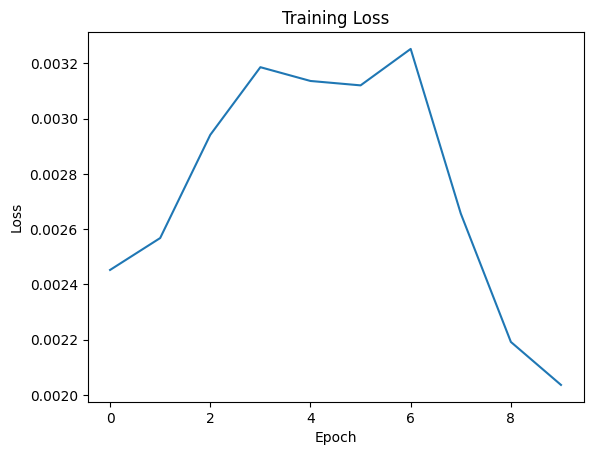

In [19]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()